In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Poultry_disease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6508 files belonging to 4 classes.


In [6]:
class_name= dataset.class_names
class_name

['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

In [7]:
train_size=0.8
len(dataset)*train_size

163.20000000000002

In [8]:
train_ds=dataset.take(163)
len(train_ds)

163

In [9]:
test_ds = dataset.skip(163)
len(test_ds)

41

In [10]:
val_ds=test_ds.take(20)
len(val_ds)

20

In [11]:
test_ds=test_ds.skip(20)
len(test_ds)

21

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

163

In [15]:
len(val_ds)

20

In [16]:
len(test_ds)

21

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(1.0/255),
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE)
])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [21]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,524 (670.02 KB)

 Trainable params: 171,524 (670.02 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 274ms/step - accuracy: 0.4147 - loss: 1.1759 - val_accuracy: 0.7359 - val_loss: 0.7620
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 269ms/step - accuracy: 0.7585 - loss: 0.6865 - val_accuracy: 0.7875 - val_loss: 0.5674
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.7873 - loss: 0.5726 - val_accuracy: 0.8062 - val_loss: 0.5408
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.8170 - loss: 0.5179 - val_accuracy: 0.7969 - val_loss: 0.5886
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 279ms/step - accuracy: 0.8292 - loss: 0.4737 - val_accuracy: 0.8313 - val_loss: 0.4927
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.8290 - loss: 0.4737 - val_accuracy: 0.8188 - val_loss: 0.5517
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 284ms/step - accuracy: 0.8535 - loss: 0.4182 - val_accuracy: 0.8562 - val_loss: 0.4446
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 289ms/step - accuracy: 0.8629 - loss: 0

In [26]:
scores=model.evaluate(test_ds)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9642 - loss: 0.0968  


In [27]:
scores

[0.11448090523481369, 0.961309552192688]

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 163}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
history.history['accuracy']

[0.5440723896026611,
 0.7777135968208313,
 0.7942647933959961,
 0.8171670436859131,
 0.8290992975234985,
 0.8387221097946167,
 0.8564280271530151,
 0.8660507798194885,
 0.8677828907966614,
 0.8789453506469727,
 0.8747113347053528,
 0.8854888081550598,
 0.8989607095718384,
 0.8995380997657776,
 0.9062740802764893,
 0.8999230265617371,
 0.9108930230140686,
 0.9047344326972961,
 0.9133949279785156,
 0.9072363376617432,
 0.9095457792282104,
 0.9189761281013489,
 0.9209007024765015,
 0.9153195023536682,
 0.923787534236908,
 0.9270592927932739,
 0.9197459816932678,
 0.9324480295181274,
 0.9220554232597351,
 0.9341801404953003,
 0.928598940372467,
 0.9414934515953064,
 0.9339876770973206,
 0.9362971782684326,
 0.9382216930389404,
 0.9382216930389404,
 0.9361047148704529,
 0.9386066198348999,
 0.9422633051872253,
 0.9428406357765198,
 0.9416859149932861,
 0.9447652101516724,
 0.937644362449646,
 0.9407236576080322,
 0.9393764138221741,
 0.9472671151161194,
 0.9451501369476318,
 0.9486142992973

In [32]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

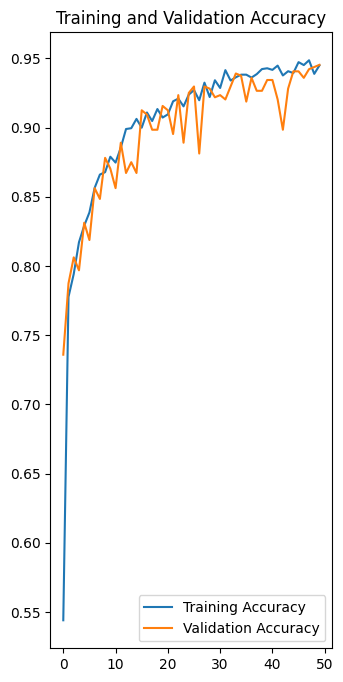

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [39]:
import numpy as np

first image to predict
Real label: New Castle Disease
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted label: New Castle Disease


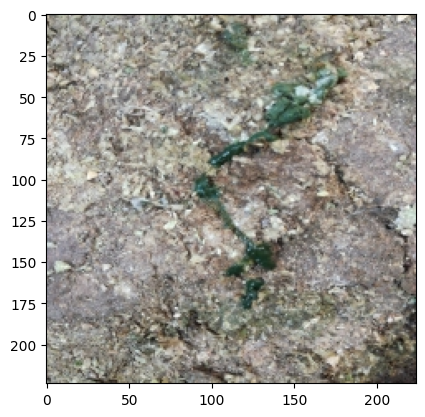

In [49]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("Real label:",class_name[first_label])

    batch_prediction=model.predict(images_batch)
    print("Predicted label:",class_name[np.argmax(batch_prediction[0])])

In [53]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_name[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


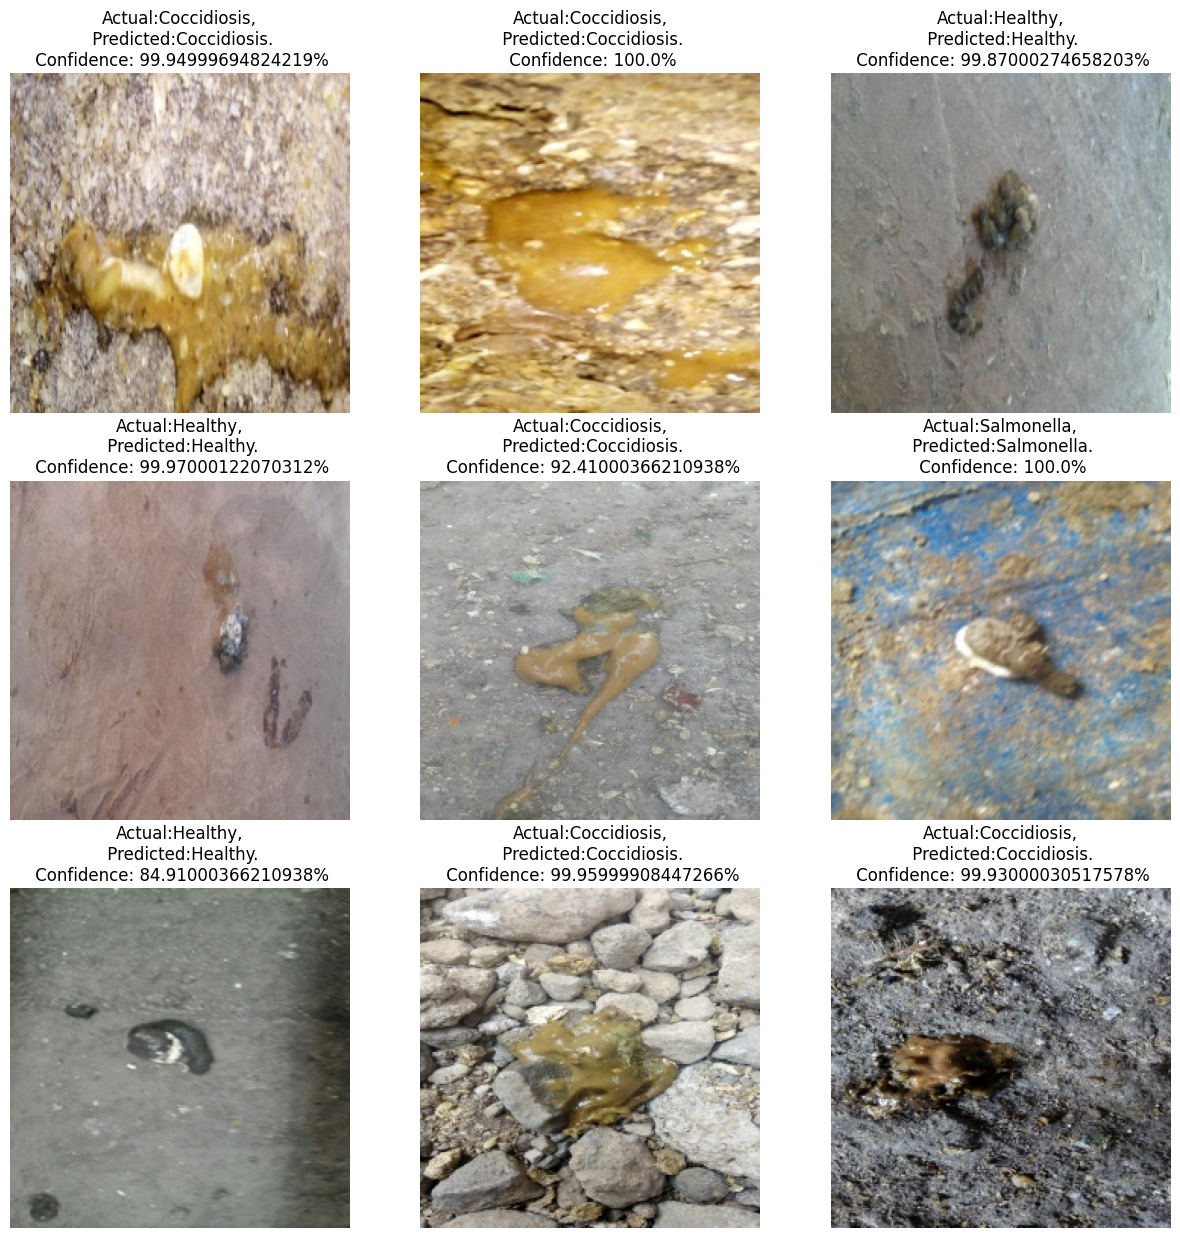

In [57]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence=predict(model,images[i].numpy())
        actual_class=class_name[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [60]:
model_version=1.1
model.export(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1.1\assets


INFO:tensorflow:Assets written to: ../models/1.1\assets


Saved artifact at '../models/1.1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2381252906832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381252914512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253925136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253925712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253926288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253926864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253926096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253927632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253927056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253928400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2381253927824: TensorSpec(shape=()